# Project 4 Biodegradebility

Link to Dataset Description : https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation#

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", 300)
%matplotlib inline

In [2]:
#custom functions
from functions import evaluate_classifier
from functions import plot_coefs

plt.rcParams["figure.figsize"] = [10,5]
results_dict_list = []
results_model_names_list = []

Load Data

In [3]:
!ls

Data                              README.md
LICENSE                           __pycache__
Pictures                          biodeg.csv
Presentation Biodegradability.pdf functions.py
Project 4 Biodegradables.ipynb


In [4]:
df = pd.read_csv("biodeg.csv", sep = ";", header = None)

Columns description, uncomment if needed

In [5]:
"""f = open("Data/description_raw.txt", "r")
description_df = pd.DataFrame(columns = ["short", "description"])
info = "start"
while len(info):
    info = f.readline()
    if not info: 
        break
    info = info.split(") ",1)[1][:-2]
    short = info.split(": ",1)[0]
    #description = info.split(": ",1)[1]
    description_df.loc[len(description_df)] = info.split(": ",1)"""

'f = open("Data/description_raw.txt", "r")\ndescription_df = pd.DataFrame(columns = ["short", "description"])\ninfo = "start"\nwhile len(info):\n    info = f.readline()\n    if not info: \n        break\n    info = info.split(") ",1)[1][:-2]\n    short = info.split(": ",1)[0]\n    #description = info.split(": ",1)[1]\n    description_df.loc[len(description_df)] = info.split(": ",1)'

In [6]:
#description_df.to_csv("data/description.csv", index=False)
description_df = pd.read_csv("data/description.csv")

In [7]:
description_df.sort_values("short")

,short,description
23,B01[C-Br],Presence/absence of C - Br at topological dist...
24,B03[C-Cl],Presence/absence of C - Cl at topological dist...
28,B04[C-Br],Presence/absence of C - Br at topological dist...
7,C%,Percentage of C atoms
32,C-026,R--CX--R
3,F01[N-N],Frequency of N-N at topological distance 1
33,F02[C-N],Frequency of C - N at topological distance 2
10,F03[C-N],Frequency of C-N at topological distance 3
15,F03[C-O],Frequency of C - O at topological distance 3
4,F04[C-N],Frequency of C-N at topological distance 4


In [8]:
df.columns = description_df.short

In [9]:
df.head()

short,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB


# Data Cleaning

In [10]:
df.dtypes.value_counts()

int64      24
float64    17
object      1
dtype: int64

In [11]:
df.isnull().sum().sum()

0

Target Variable:

In [12]:
df.replace(["RB","NRB"],[1,0], inplace = True)

In [13]:
df.rename(columns = {"experimental class": "degradable"}, inplace = True);

In [14]:
#Save Cleaned Data
#df.to_csv("biodeg_cleaned.csv", index=False)
#df = pd.read_csv("biodeg_cleaned.csv")

# EDA

In [15]:
df.describe()

short,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,1.436967,-0.197129,3.476844,1.350716,9.937381,3.630332,1.013302,1.131106,0.008531,0.073934,0.029384,1.238727,1.405687,0.039810,0.147867,0.031280,2.215641,-0.001206,0.026540,8.780510,2.668344,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223,0.337441
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,3.116577,0.769662,0.584150,0.786166,0.928678,4.457243,0.046494,0.030143,0.101802,0.317475,0.217997,0.096466,4.788542,0.195606,0.355137,0.199544,0.226131,0.158928,0.160812,11.895889,2.096607,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286,0.473061
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.863000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.099000,0.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,0.000000,-0.191000,3.105000,0.875000,9.533000,0.000000,0.983000,1.116000,0.000000,0.000000,0.000000,1.182000,0.000000,0.000000,0.000000,0.000000,2.101000,-0.008000,0.000000,0.000000,1.446500,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,0.000000,0.000000,3.442000,1.187000,10.039000,2.000000,1.003000,1.130000,0.000000,0.000000,0.000000,1.243000,1.000000,0.000000,0.000000,0.000000,2.247000,0.000000,0.000000,0.000000,2.052000,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,2.000000,0.000000,3.825500,1.705000,10.514500,6.000000,1.029000,1.143000,0.000000,0.000000,0.000000,1.296000,2.000000,0.000000,0.000000,0.000000,2.358000,0.005000,0.000000,12.465000,3.146000,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000,1.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,2.000000,3.000000,3.000000,1.641000,147.000000,1.000000,1.000000,3.000000,2.859000,1.073000,1.000000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000,1.000000


Check for Class Inbalance

In [16]:
df["degradable"].value_counts(normalize = True)

0    0.662559
1    0.337441
Name: degradable, dtype: float64

In [17]:
# NRB = 0 --> Not Biodegradable
# RB = 1 --> Biodegradable

--> Class inbalance acceptable

Check for Multicorrelation

In [18]:
abs(df.corr()["degradable"]).sort_values(ascending = False).head(11)

short
degradable     1.000000
SpMax_L        0.396138
SpMax_A        0.389951
SpPosA_B(p)    0.372254
SM6_B(m)       0.366793
HyWi_B(m)      0.343779
SM6_L          0.343377
nCb-           0.337268
C-026          0.318547
nHM            0.299107
SpMax_B(m)     0.289619
Name: degradable, dtype: float64

In [19]:
df.corr().applymap(lambda x: x if abs(x)>.90 else "")

short,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
short,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SpMax_L,1,,,,,,,,,,,,,,0.911546,,,,,,,,,,,,0.918928,,,,,,,,,,,,,,,
J_Dz(e),,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nHM,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F01[N-N],,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F04[C-N],,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NssssC,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCb-,,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C%,,,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCp,,,,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Remove Multicorrelated Features

In [20]:
corr_drop = ["SM6_L","SpMax_A","SM6_B(m)"]
corr_keep = list(set(df.columns)-set(corr_drop))

Comparision between feature distribution in the two target classes

In [21]:
# Split into Target True and False
bio_df = df.loc[df["degradable"] == 1]
no_bio_df = df.loc[df["degradable"] == 0]

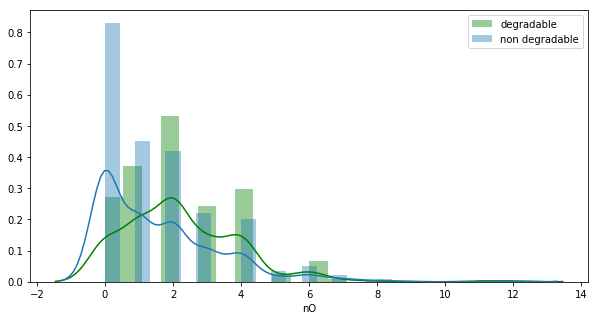

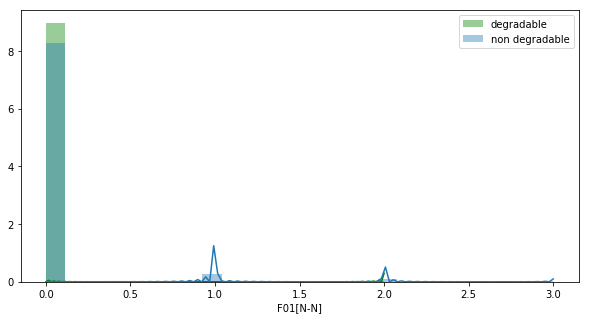

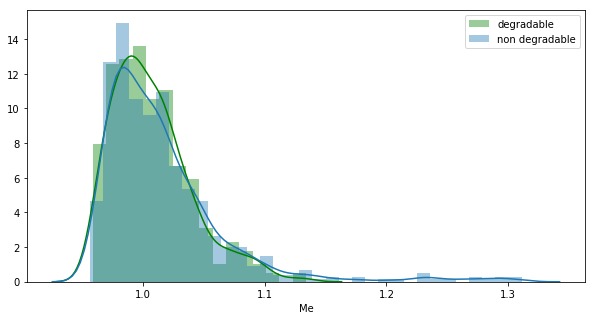

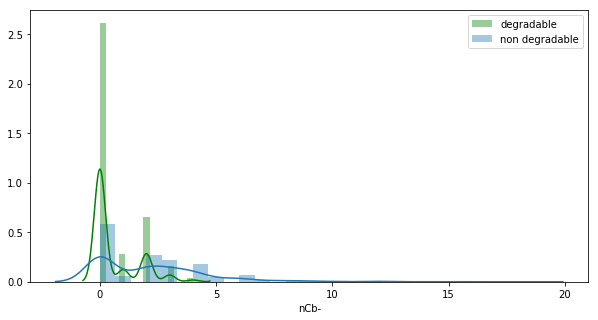

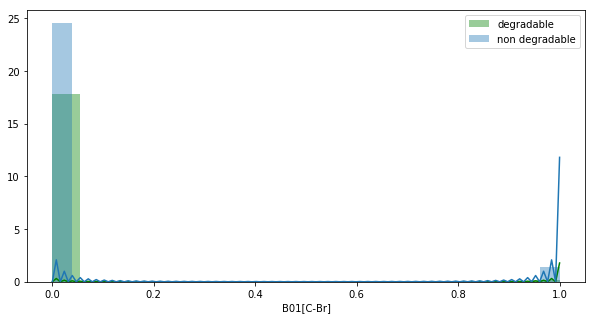

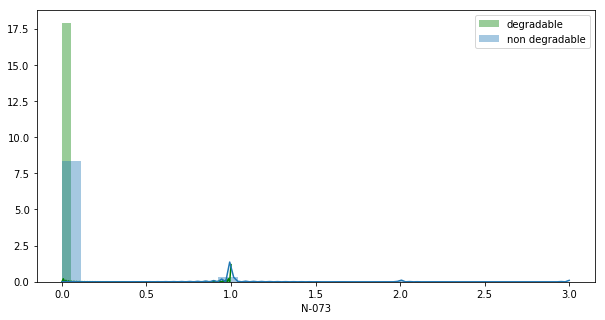

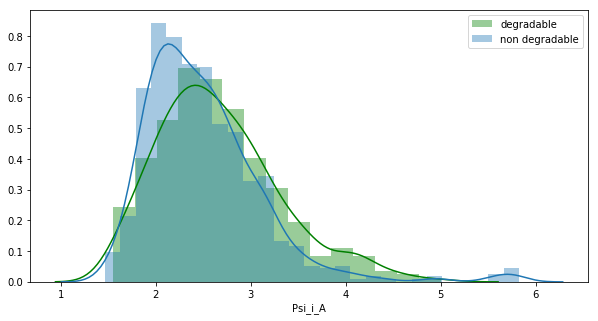

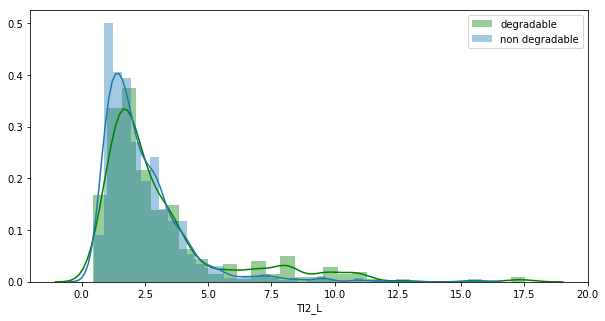

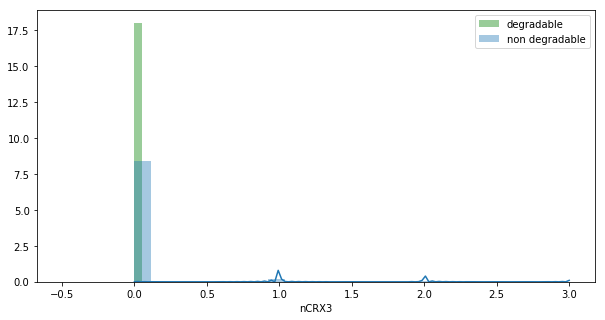

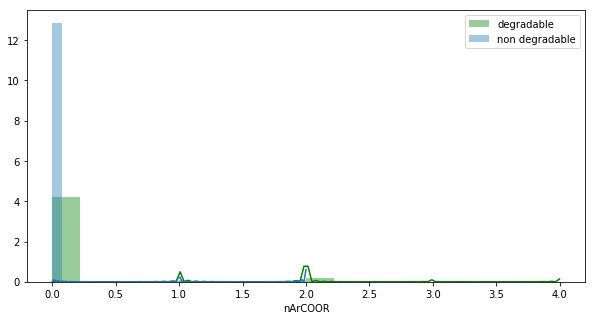

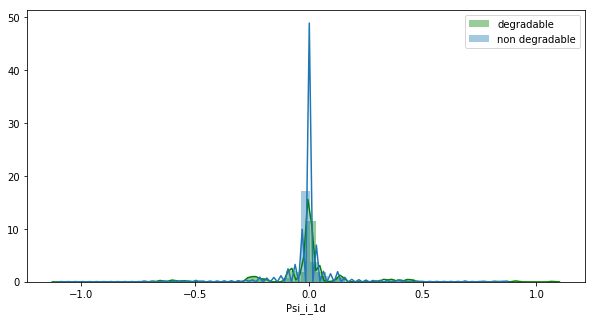

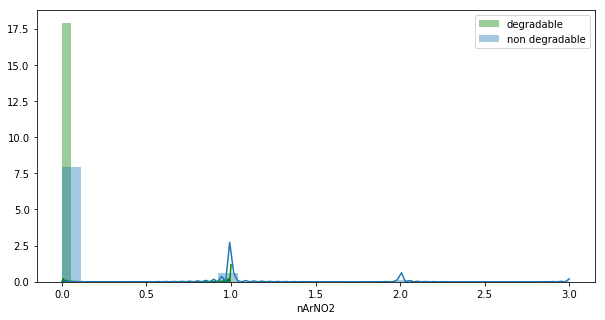

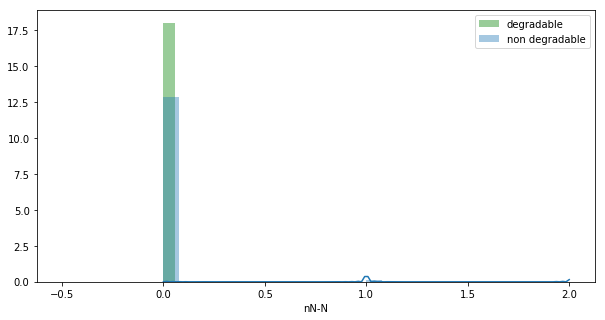

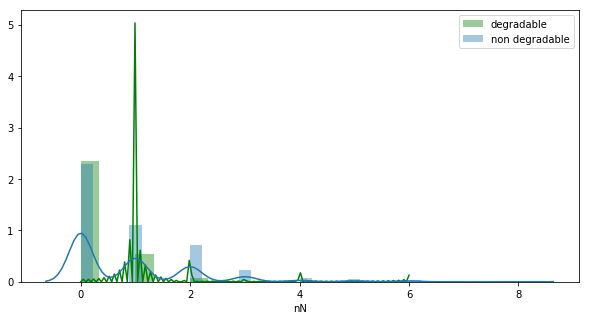

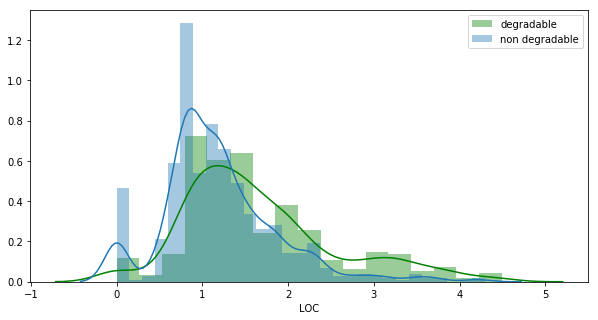

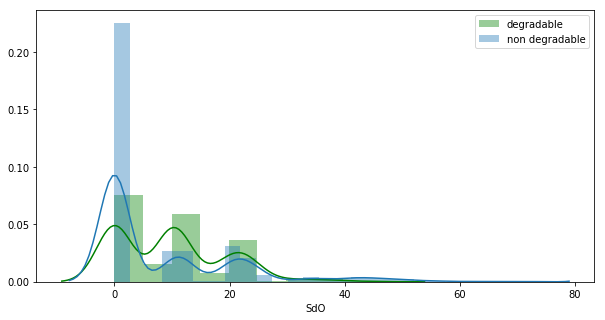

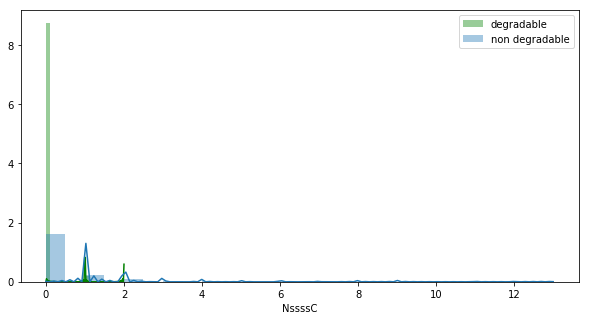

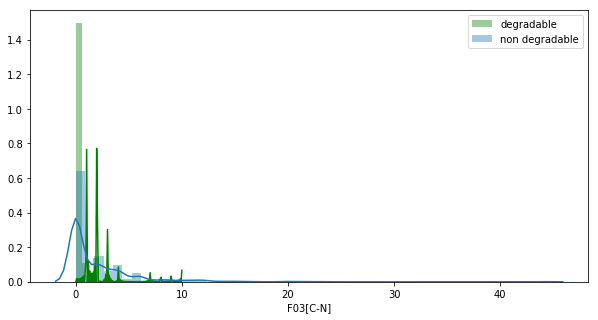

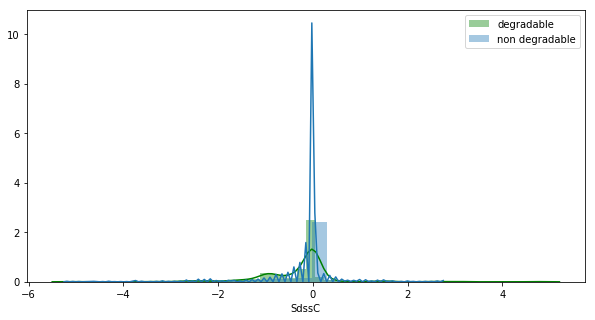

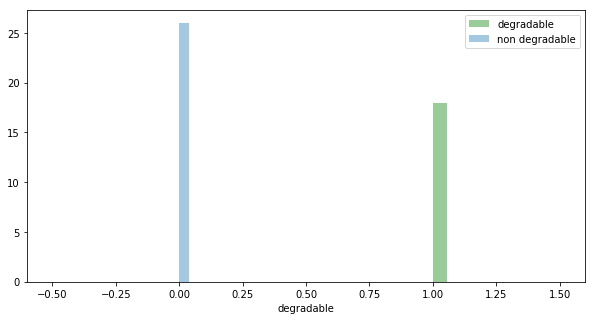

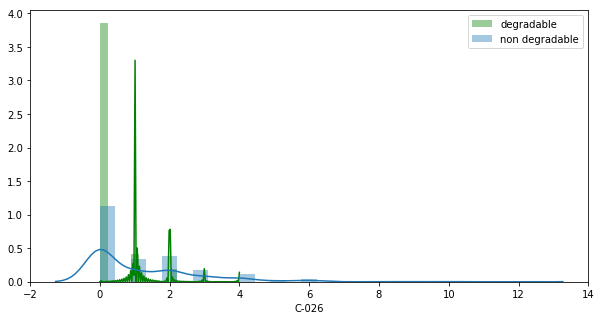

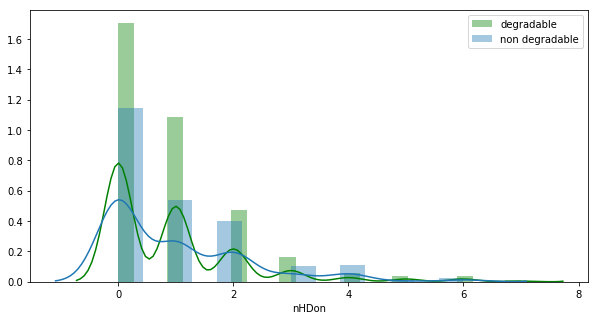

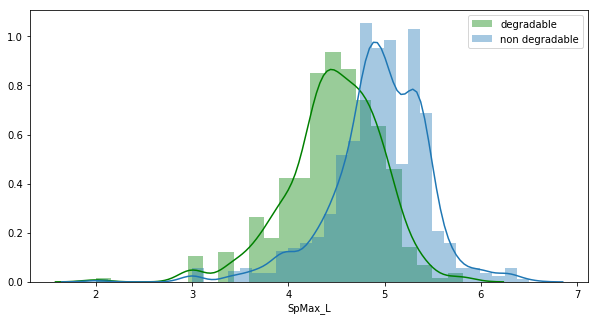

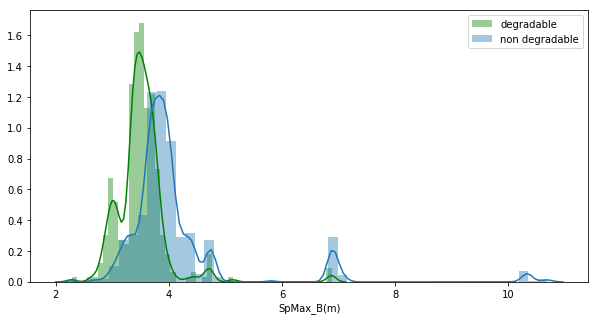

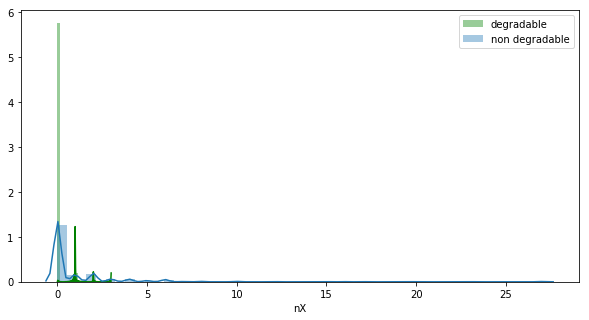

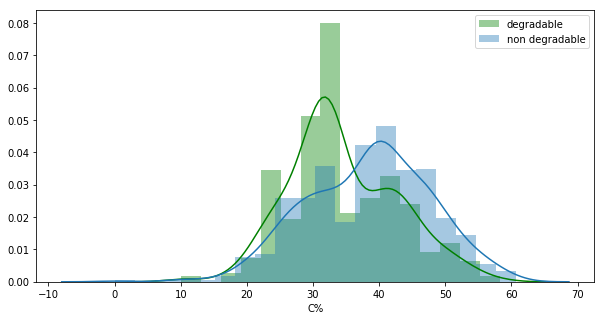

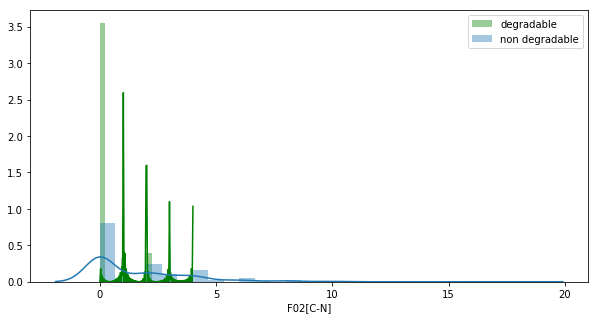

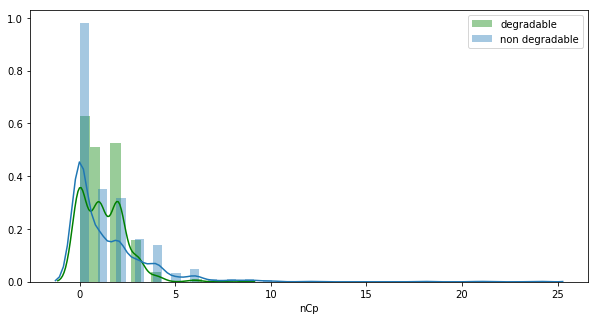

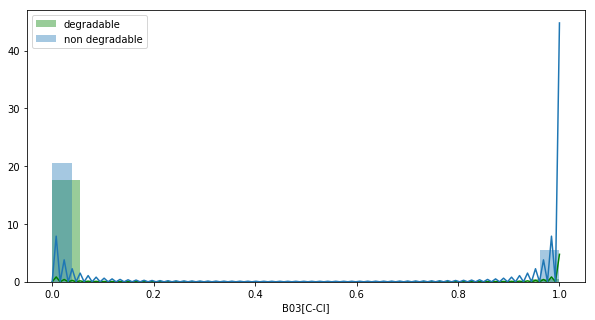

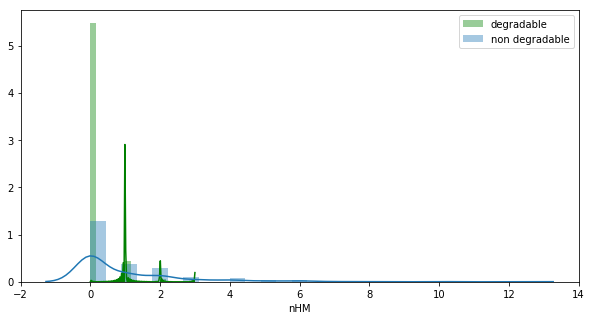

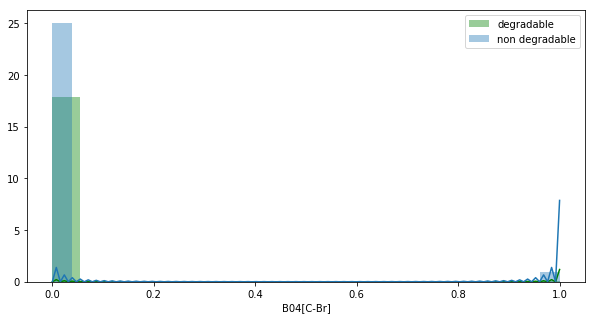

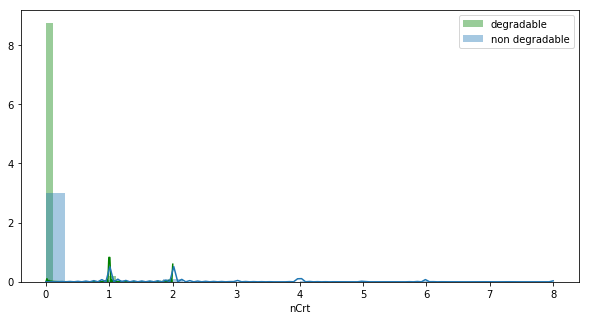

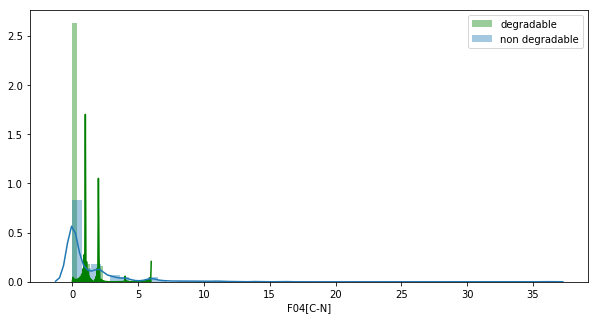

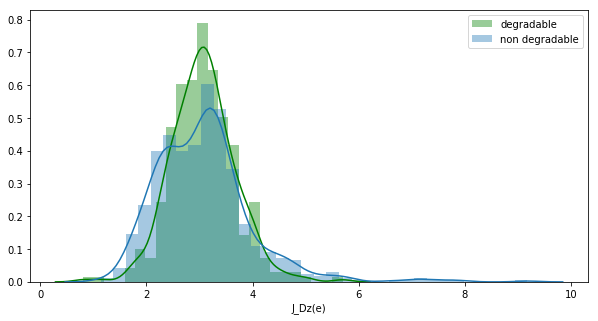

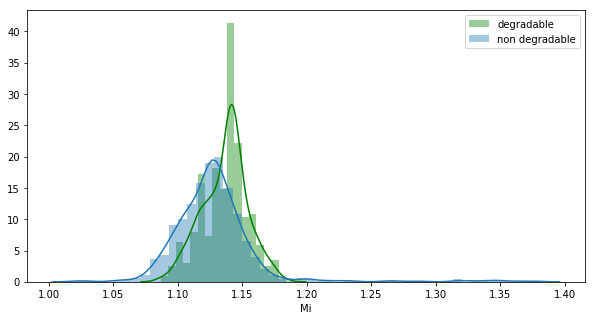

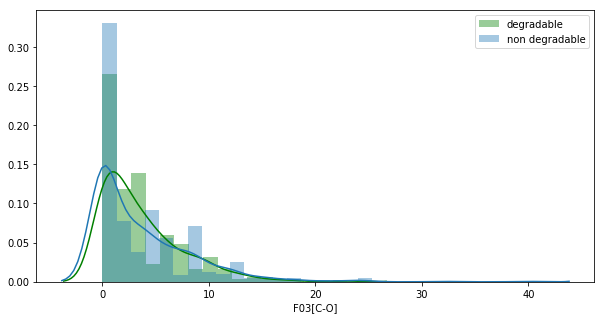

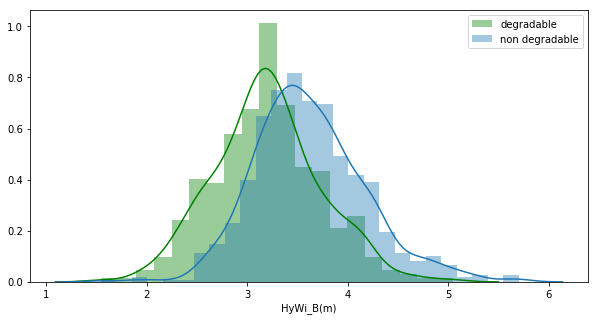

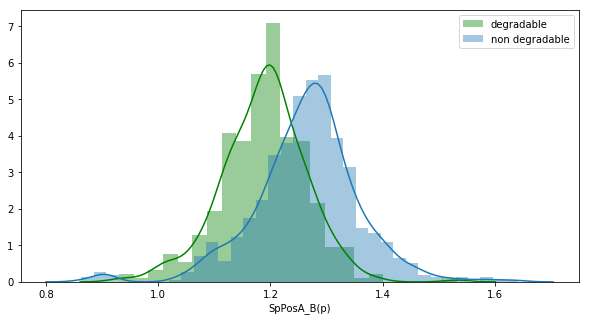

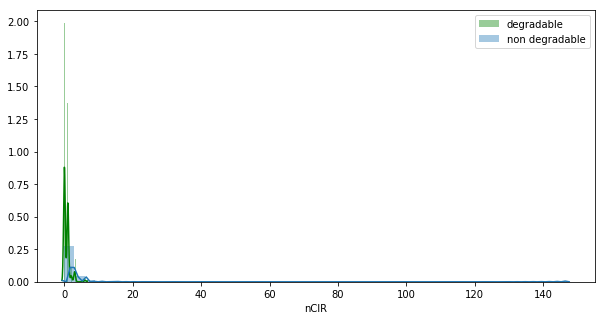

In [22]:
features = corr_keep
for col in list(filter(lambda x: x != "diagnosis", features)):
    sns.distplot(bio_df[col] ,label = "degradable", color = "g")
    sns.distplot(no_bio_df[col], label = "non degradable" )
    plt.legend()
    plt.show()

Check for categorical features

In [23]:
#If feature has more then 10 unique values it is probably not categorical, but continuous.
features = corr_keep
for col in features:
    print(col)
    valc = df[col].value_counts(normalize = True)
    if len(valc)<10:
        print(valc)
    else:
        print("probably not categorical")

nO
probably not categorical
F01[N-N]
0    0.968720
1    0.020853
2    0.009479
3    0.000948
Name: F01[N-N], dtype: float64
Me
probably not categorical
nCb-
probably not categorical
B01[C-Br]
0    0.96019
1    0.03981
Name: B01[C-Br], dtype: float64
N-073
0    0.972512
1    0.024645
2    0.001896
3    0.000948
Name: N-073, dtype: float64
Psi_i_A
probably not categorical
TI2_L
probably not categorical
nCRX3
0    0.979147
1    0.013270
2    0.006635
3    0.000948
Name: nCRX3, dtype: float64
nArCOOR
0    0.971564
2    0.018009
1    0.008531
4    0.000948
3    0.000948
Name: nArCOOR, dtype: float64
Psi_i_1d
probably not categorical
nArNO2
0    0.940284
1    0.047393
2    0.010427
3    0.001896
Name: nArNO2, dtype: float64
nN-N
0    0.992417
1    0.006635
2    0.000948
Name: nN-N, dtype: float64
nN
0    0.600948
1    0.224645
2    0.111848
3    0.036019
4    0.012322
6    0.006635
5    0.006635
8    0.000948
Name: nN, dtype: float64
LOC
probably not categorical
SdO
probably not categorical


## Results of EDA

The following Features lead to a high speration of the target classes. 
+ SpPosA_B(p)
+ HyWi_B(m)
+ C%
+ SpMax_B(m)
+ SpMax_L

# Feature Engineering

In [24]:
df.shape

(1055, 42)

## Number of Heavy Meatals
This feature will be recoded to inform about heavy Metal atoms:
+ It is most likely that in degradable organic compounds there is only one heavy metal present (nHM =1) in as a single central atom in a chemical complex bound.
+ If nHM exeeds one a compound will be either anorganic or of high toxicity and therefore lead to low biodegradability. (nHM >1)

In [25]:
def encode_nHM(x):
    if x == 0:
        return "light"
    if x == 1:
        return "functional"
    if x >1:
        return "heavy"

In [26]:
df["nHM_enc"] = df["nHM"].apply(encode_nHM)

Grouping shows that there is in fact a certain seperation of target classes in using this feature.

In [27]:
df.groupby(["nHM_enc","degradable"]).count()

short                  SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  \
nHM_enc    degradable                                                      
functional 0               116      116  116       116       116     116   
           1                26       26   26        26        26      26   
heavy      0               181      181  181       181       181     181   
           1                 5        5    5         5         5       5   
light      0               402      402  402       402       402     402   
           1               325      325  325       325       325     325   

short                  nCb-   C%  nCp   nO  F03[C-N]  SdssC  HyWi_B(m)  LOC  \
nHM_enc    degradable                                                         
functional 0            116  116  116  116       116    116        116  116   
           1             26   26   26   26        26     26         26   26   
heavy      0            181  181  181  181       181    181        181  181   
           1              5    5    5    5         5      5          5    5   
light      0            402  402  402  402       402    402        402  402   
           1            325  325  325  325       325    325        325  325   

short                  SM6_L  F03[C-O]   Me   Mi  nN-N  nArNO2  nCRX3  \
nHM_enc    degradable                                                   
functional 0             116       116  116  116   116     116    116   
           1              26        26   26   26    26      26     26   
heavy      0             181       181  181  181   181     181    181   
           1               5         5    5    5     5       5      5   
light      0             402       402  402  402   402     402    402   
           1             325       325  325  325   325     325    325   

short                  SpPosA_B(p)  nCIR  B01[C-Br]  B03[C-Cl]  N-073  \
nHM_enc    degradable                                                   
functional 0                   116   116        116        116    116   
           1                    26    26         26         26     26   
heavy      0                   181   181        181        181    181   
           1                     5     5          5          5      5   
light      0                   402   402        402        402    402   
           1                   325   325        325        325    325   

short                  SpMax_A  Psi_i_1d  B04[C-Br]  SdO  TI2_L  nCrt  C-026  \
nHM_enc    degradable                                                          
functional 0               116       116        116  116    116   116    116   
           1                26        26         26   26     26    26     26   
heavy      0               181       181        181  181    181   181    181   
           1                 5         5          5    5      5     5      5   
light      0               402       402        402  402    402   402    402   
           1               325       325        325  325    325   325    325   

short                  F02[C-N]  nHDon  SpMax_B(m)  Psi_i_A   nN  SM6_B(m)  \
nHM_enc    degradable                                                        
functional 0                116    116         116      116  116       116   
           1                 26     26          26       26   26        26   
heavy      0                181    181         181      181  181       181   
           1                  5      5           5        5    5         5   
light      0                402    402         402      402  402       402   
           1                325    325         325      325  325       325   

short                  nArCOOR   nX  
nHM_enc    degradable                
functional 0               116  116  
           1                26   26  
heavy      0               181  181  
           1                 5    5  
light      0               402  402  
           1               325  325

In [28]:
nHM_dummies = pd.get_dummies(df["nHM_enc"],"nHM").drop("nHM_light",axis = 1)
df = pd.concat([df,nHM_dummies], axis = 1).drop("nHM_enc", axis = 1)

## Molecule Shape
The number of terminal C-Atoms informs about the overall shape of a moleculy, highly branched meolekules are expected to be less degradable, because the branches make it harder for enzymes to connect to the molecule and deconstruct it.

In [29]:
def shape_class(x):
    if x == 0:
        return "ring"
    if x == 1:
        return "semi_ring"
    if x == 2:
        return "linear"
    if x >2:
        return "branched"

In [30]:
df["molShape"] = df["nCp"].apply(shape_class)

Grouping shows that espeacially branched and ring shaped molecules provide a good seperation between target classes.

In [31]:
df.groupby(["molShape","degradable"]).count()

SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  nCb-  \
molShape  degradable                                                            
branched  0               145      145  145       145       145     145   145   
          1                40       40   40        40        40      40    40   
linear    0               107      107  107       107       107     107   107   
          1               100      100  100       100       100     100   100   
ring      0               329      329  329       329       329     329   329   
          1               119      119  119       119       119     119   119   
semi_ring 0               118      118  118       118       118     118   118   
          1                97       97   97        97        97      97    97   

                       C%  nCp   nO  F03[C-N]  SdssC  HyWi_B(m)  LOC  SM6_L  \
molShape  degradable                                                          
branched  0           145  145  145       145    145        145  145    145   
          1            40   40   40        40     40         40   40     40   
linear    0           107  107  107       107    107        107  107    107   
          1           100  100  100       100    100        100  100    100   
ring      0           329  329  329       329    329        329  329    329   
          1           119  119  119       119    119        119  119    119   
semi_ring 0           118  118  118       118    118        118  118    118   
          1            97   97   97        97     97         97   97     97   

                      F03[C-O]   Me   Mi  nN-N  nArNO2  nCRX3  SpPosA_B(p)  \
molShape  degradable                                                         
branched  0                145  145  145   145     145    145          145   
          1                 40   40   40    40      40     40           40   
linear    0                107  107  107   107     107    107          107   
          1                100  100  100   100     100    100          100   
ring      0                329  329  329   329     329    329          329   
          1                119  119  119   119     119    119          119   
semi_ring 0                118  118  118   118     118    118          118   
          1                 97   97   97    97      97     97           97   

                      nCIR  B01[C-Br]  B03[C-Cl]  N-073  SpMax_A  Psi_i_1d  \
molShape  degradable                                                         
branched  0            145        145        145    145      145       145   
          1             40         40         40     40       40        40   
linear    0            107        107        107    107      107       107   
          1            100        100        100    100      100       100   
ring      0            329        329        329    329      329       329   
          1            119        119        119    119      119       119   
semi_ring 0            118        118        118    118      118       118   
          1             97         97         97     97       97        97   

                      B04[C-Br]  SdO  TI2_L  nCrt  C-026  F02[C-N]  nHDon  \
molShape  degradable                                                        
branched  0                 145  145    145   145    145       145    145   
          1                  40   40     40    40     40        40     40   
linear    0                 107  107    107   107    107       107    107   
          1                 100  100    100   100    100       100    100   
ring      0                 329  329    329   329    329       329    329   
          1                 119  119    119   119    119       119    119   
semi_ring 0                 118  118    118   118    118       118    118   
          1                  97   97     97    97     97        97     97   

                      SpMax_B(m)  Psi_i_A   nN  SM6_B(m)  nArCOOR   nX  \
molShape  deg

In [32]:
mS_dummies = pd.get_dummies(df["molShape"],"mS").drop("mS_semi_ring",axis = 1)
df = pd.concat([df,mS_dummies], axis = 1).drop("molShape",axis = 1)

## Esther
Having a Esther group in the molecule provides an easy breaking point due to hydrolysis. Therefore degradability should improve in esthers.

In [33]:
df["esther"] = df.nArCOOR.apply(lambda x: 1 if x>0 else x)

Grouping shows s seperation but the data lecks observations with molecule containing esther groups. Therefor the effect of this festure will be hardly recognisable

In [34]:
df.groupby(["esther","degradable"]).count()

SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  nCb-  \
esther degradable                                                            
0      0               691      691  691       691       691     691   691   
       1               334      334  334       334       334     334   334   
1      0                 8        8    8         8         8       8     8   
       1                22       22   22        22        22      22    22   

                    C%  nCp   nO  F03[C-N]  SdssC  HyWi_B(m)  LOC  SM6_L  \
esther degradable                                                          
0      0           691  691  691       691    691        691  691    691   
       1           334  334  334       334    334        334  334    334   
1      0             8    8    8         8      8          8    8      8   
       1            22   22   22        22     22         22   22     22   

                   F03[C-O]   Me   Mi  nN-N  nArNO2  nCRX3  SpPosA_B(p)  nCIR  \
esther degradable                                                               
0      0                691  691  691   691     691    691          691   691   
       1                334  334  334   334     334    334          334   334   
1      0                  8    8    8     8       8      8            8     8   
       1                 22   22   22    22      22     22           22    22   

                   B01[C-Br]  B03[C-Cl]  N-073  SpMax_A  Psi_i_1d  B04[C-Br]  \
esther degradable                                                              
0      0                 691        691    691      691       691        691   
       1                 334        334    334      334       334        334   
1      0                   8          8      8        8         8          8   
       1                  22         22     22       22        22         22   

                   SdO  TI2_L  nCrt  C-026  F02[C-N]  nHDon  SpMax_B(m)  \
esther degradable                                                         
0      0           691    691   691    691       691    691         691   
       1           334    334   334    334       334    334         334   
1      0             8      8     8      8         8      8           8   
       1            22     22    22     22        22     22          22   

                   Psi_i_A   nN  SM6_B(m)  nArCOOR   nX  nHM_functional  \
esther degradable                                                         
0      0               691  691       691      691  691             691   
       1               334  334       334      334  334             334   
1      0                 8    8         8        8    8               8   
       1                22   22        22       22   22              22   

                   nHM_heavy  mS_branched  mS_linear  mS_ring  
esther degradable                                              
0      0                 691          691        691      691  
       1                 334          334        334      334  
1      0                   8            8          8        8  
       1                  22           22         22       22

In [35]:
df.dtypes.value_counts()

int64      26
float64    17
uint8       5
dtype: int64

Save/Load engineered DataFrame

In [36]:
#df.to_csv("Data/df_engineered.csv", index=False)
#df = pd.read_csv("Data/df_engineered.csv")

In [37]:
df.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable,nHM_functional,nHM_heavy,mS_branched,mS_linear,mS_ring,esther
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1,0,0,0,1,0,0
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1,0,0,0,0,0,0
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1,0,0,0,1,0,0
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1,0,0,0,0,1,0
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1,0,0,0,1,0,0


## Train_Test_Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#remove colinear columns as identified in EDA
keep = list(set(df.columns) - set(corr_drop))

Define Target and Feature Variables and perform standard 80/20 split.

In [40]:
y = df.degradable
X = df[keep].drop("degradable", axis = 1)
X_train, X_test, y_train , y_test = train_test_split(X,y ,random_state=42 , test_size = 0.3)

In [41]:
X_train.shape, X_test.shape

((738, 44), (317, 44))

In [42]:
y_train.shape , y_test.shape

((738,), (317,))

## Transformation

In [43]:
from sklearn.preprocessing import StandardScaler

### Poly

Generate Interaction Terms

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly = PolynomialFeatures(2,include_bias = False)
poly.fit(X_train)
X_train_poly = (pd.DataFrame(poly.transform(X_train),columns = poly.get_feature_names(X_train.columns)))
X_test_poly = (pd.DataFrame(poly.transform(X_test),columns = poly.get_feature_names(X_train.columns)))

Scale Features to improve Model performance

In [46]:
scaler_poly = StandardScaler()
scaler_poly.fit(X_train_poly)
X_train_poly = pd.DataFrame(scaler_poly.transform(X_train_poly),columns = X_train_poly.columns)
X_test_poly = pd.DataFrame(scaler_poly.transform(X_test_poly),columns = X_train_poly.columns)

### Linear

Scale Features to improve Model performance

In [47]:
scaler_lin = StandardScaler()
scaler_lin.fit(X_train)
X_train = pd.DataFrame(scaler_lin.transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler_lin.transform(X_test),columns = X_train.columns)

In [48]:
lin_cols_all = X_train.columns

#X_train.to_csv("Data/X_train_lin_scaled.csv", index=False)
#X_test.to_csv("Data/X_test_lin_scaled.csv", index=False)

# Feature Selection

Feature Selection will be performed using Lasso Penalty in a Logistic Regression Classifier Model.
The target metric wills be:
+ Precission (because predicting biodegradability when the molecule is not (False Positive) is worse than predicting nondegradability allthough the molecule is degradable.
+ Specificity (to compare Model performance with Values in the Scource Paper)
+ Sensitivity (to compare Model performance with Values in the Scource Paper)
+ F1 (to get an overall scoring)

Features are dropped if dropping them does not significantly lower model performance.

In [49]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

## Basemodel

### Logistic Regression

Normalized confusion matrix
[[0.89952153 0.10047847]
 [0.13888889 0.86111111]]


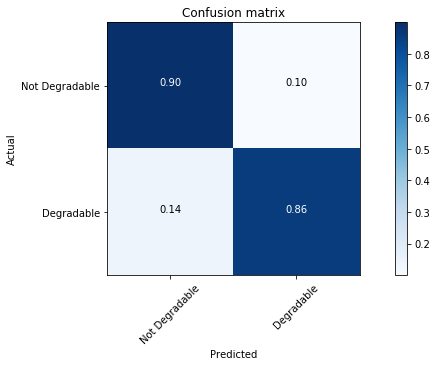

Our Accuracy is: 0.886435331230284
Our Precision is: 0.8157894736842105
Our Sensitivity is: 0.8611111111111112
Our F-Score is: 0.8378378378378377


In [50]:
logReg_base = LogisticRegression(random_state=42)

logReg_base.fit(X_train,y_train)
logReg_base_pred = logReg_base.predict(X_test)
results_dict_list.append(evaluate_classifier(y_test,logReg_base_pred, normalize=True))
results_model_names_list.append("LogR_base")

# Modeling

## Linear

## Logistic Regression

Normalized confusion matrix
[[0.89473684 0.10526316]
 [0.13888889 0.86111111]]


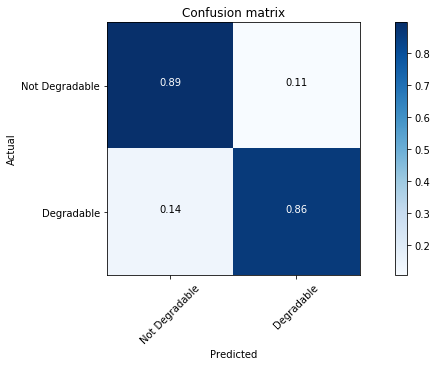

Our Accuracy is: 0.8832807570977917
Our Precision is: 0.808695652173913
Our Sensitivity is: 0.8611111111111112
Our F-Score is: 0.8340807174887893


<Figure size 1152x1080 with 0 Axes>

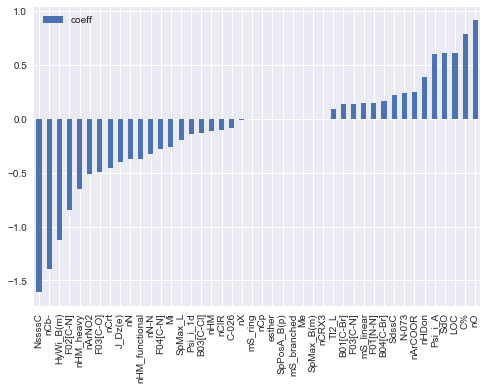

In [51]:
logReg_base_l1 = LogisticRegression(solver = "saga", penalty = "l1", C = 0.7, random_state=42)

logReg_base_l1.fit(X_train,y_train)
logReg_base_l1_pred = logReg_base_l1.predict(X_test)
results_dict_list.append(evaluate_classifier(y_test,logReg_base_l1_pred, normalize=True))
drop_l1 = plot_coefs(X_train,logReg_base_l1)
results_model_names_list.append("LogR_lin_l1")

In [52]:
l1_keep = list(set(X_train.columns) - set(drop_l1))
l1_keep

['nO',
 'F01[N-N]',
 'nCb-',
 'B01[C-Br]',
 'N-073',
 'Psi_i_A',
 'TI2_L',
 'nArCOOR',
 'mS_linear',
 'nHM_functional',
 'Psi_i_1d',
 'nArNO2',
 'nN-N',
 'nN',
 'LOC',
 'SdO',
 'NssssC',
 'F03[C-N]',
 'SdssC',
 'C-026',
 'nHDon',
 'SpMax_L',
 'nX',
 'C%',
 'F02[C-N]',
 'B03[C-Cl]',
 'nHM',
 'B04[C-Br]',
 'nCrt',
 'F04[C-N]',
 'J_Dz(e)',
 'Mi',
 'F03[C-O]',
 'HyWi_B(m)',
 'nHM_heavy',
 'nCIR']

## Random Forrest

In [53]:
from sklearn.ensemble import RandomForestClassifier

Normalized confusion matrix
[[0.9138756  0.0861244 ]
 [0.17592593 0.82407407]]


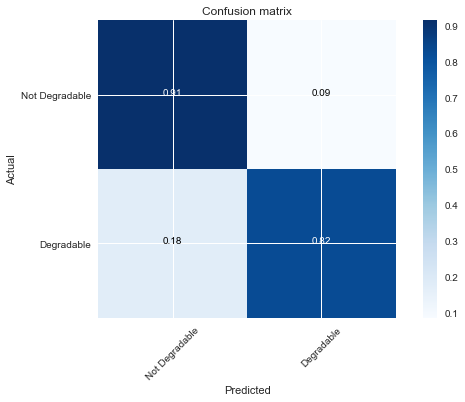

Our Accuracy is: 0.8832807570977917
Our Precision is: 0.8317757009345794
Our Sensitivity is: 0.8240740740740741
Our F-Score is: 0.827906976744186


In [54]:
forest_base = RandomForestClassifier(n_estimators=100, random_state=42)

forest_base.fit(X_train,y_train)
forest_base_pred = forest_base.predict(X_test)
results_dict_list.append(evaluate_classifier(y_test,forest_base_pred, normalize=True));
results_model_names_list.append("RandFor_lin")

## KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

Normalized confusion matrix
[[0.81818182 0.18181818]
 [0.18518519 0.81481481]]


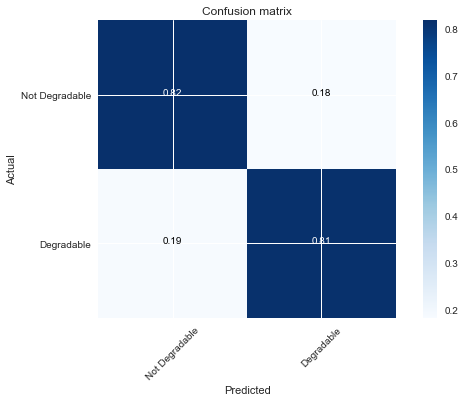

Our Accuracy is: 0.8170347003154574
Our Precision is: 0.6984126984126984
Our Sensitivity is: 0.8148148148148148
Our F-Score is: 0.7521367521367521


In [56]:
KNN_base = KNeighborsClassifier(n_neighbors = 13)

KNN_base.fit(X_train,y_train)
KNN_base_pred = KNN_base.predict(X_test)
results_dict_list.append(evaluate_classifier(y_test,KNN_base_pred, normalize=True));
results_model_names_list.append("KNN_lin")

## Ensemble

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [58]:
clf1 = logReg_base_l1
clf2 = forest_base
clf3 = KNN_base
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('KNN', clf3)], voting='hard')
eclf.fit(X_train,y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'KNN', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
    print("F1: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

F1: 0.78 (+/- 0.04) [Logistic Regression]
F1: 0.79 (+/- 0.03) [Random Forest]
F1: 0.78 (+/- 0.05) [KNN]
F1: 0.81 (+/- 0.04) [Ensemble]


Normalized confusion matrix
[[0.90909091 0.09090909]
 [0.15740741 0.84259259]]


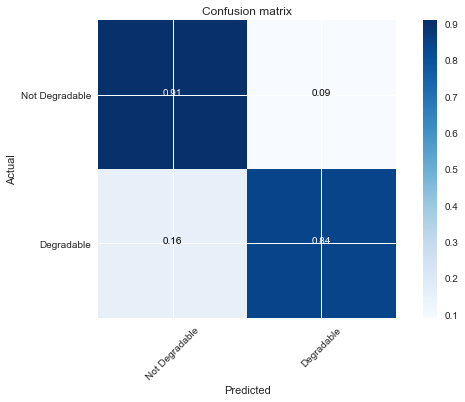

Our Accuracy is: 0.886435331230284
Our Precision is: 0.8272727272727273
Our Sensitivity is: 0.8425925925925926
Our F-Score is: 0.834862385321101


In [59]:
eclf_base_pred = eclf.predict(X_test)
results_dict_list.append(evaluate_classifier(y_test,eclf_base_pred, normalize=True));
results_model_names_list.append("Ensemble_lin")

## Poly

## Logistic Regression

In [60]:
X_train = X_train_poly.copy()
X_test = X_test_poly.copy()

Normalized confusion matrix
[[0.78947368 0.21052632]
 [0.10185185 0.89814815]]


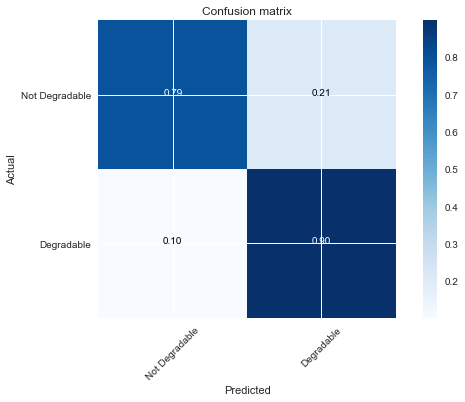

Our Accuracy is: 0.8264984227129337
Our Precision is: 0.6879432624113475
Our Sensitivity is: 0.8981481481481481
Our F-Score is: 0.7791164658634538


<Figure size 1152x1080 with 0 Axes>

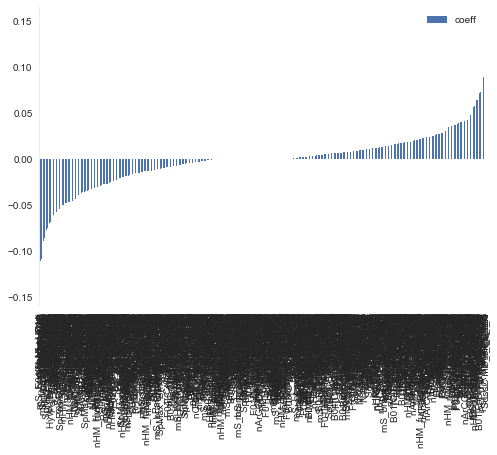

In [61]:
logReg_base_l1_poly = LogisticRegression(solver = "saga", penalty = "l1", C = 1, random_state=42)

logReg_base_l1_poly.fit(X_train_poly,y_train)
logReg_base_l1_poly_pred = logReg_base_l1_poly.predict(X_test_poly)
results_dict_list.append(evaluate_classifier(y_test,logReg_base_l1_poly_pred, normalize=True))
drop_l1_poly = plot_coefs(X_train_poly,logReg_base_l1_poly)
results_model_names_list.append("LogR_poly")

## Random Forrest

Normalized confusion matrix
[[0.90909091 0.09090909]
 [0.2037037  0.7962963 ]]


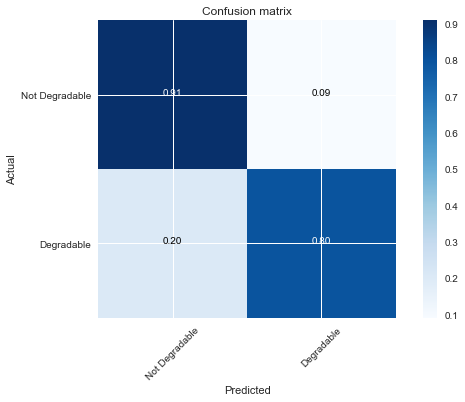

Our Accuracy is: 0.8706624605678234
Our Precision is: 0.819047619047619
Our Sensitivity is: 0.7962962962962963
Our F-Score is: 0.8075117370892019


In [62]:

forest_base = RandomForestClassifier(n_estimators=100, random_state=42)

forest_base.fit(X_train,y_train)
forest_base_pred = forest_base.predict(X_test)
results_dict_list.append(evaluate_classifier(y_test,forest_base_pred, normalize=True));
results_model_names_list.append("RandFor_poly")

In [63]:
rfc_featimp_df = pd.DataFrame(forest_base.feature_importances_, index = X_train.columns)
sorted_rfc = rfc_featimp_df.sort_values(by = 0, ascending = False)
rfc_add = list(sorted_rfc[sorted_rfc[0]>0.01].head(3).index)
rfc_add

['SpMax_L SpPosA_B(p)', 'SpMax_L Mi', 'SpMax_B(m)']

## KNN

Normalized confusion matrix
[[0.80382775 0.19617225]
 [0.15740741 0.84259259]]


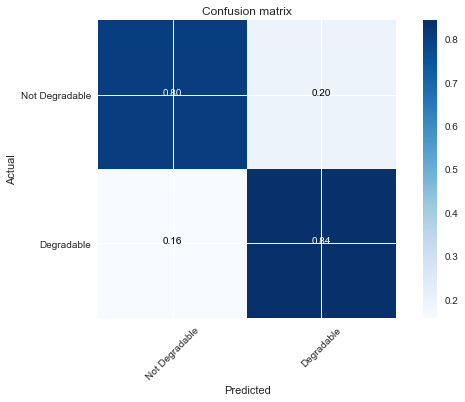

Our Accuracy is: 0.8170347003154574
Our Precision is: 0.6893939393939394
Our Sensitivity is: 0.8425925925925926
Our F-Score is: 0.7583333333333334


In [64]:

KNN_base = KNeighborsClassifier(n_neighbors = 13)

KNN_base.fit(X_train,y_train)
KNN_base_pred = KNN_base.predict(X_test)
results_dict_list.append(evaluate_classifier(y_test,KNN_base_pred, normalize=True));
results_model_names_list.append("KNN_poly")

## Ensemble

In [65]:

clf1 = logReg_base_l1
clf2 = forest_base
clf3 = KNN_base
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('KNN', clf3)], voting='hard')
eclf.fit(X_train,y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'KNN', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
    print("F1: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

F1: 0.76 (+/- 0.03) [Logistic Regression]
F1: 0.79 (+/- 0.02) [Random Forest]
F1: 0.73 (+/- 0.03) [KNN]
F1: 0.78 (+/- 0.03) [Ensemble]


Normalized confusion matrix
[[0.84210526 0.15789474]
 [0.13888889 0.86111111]]


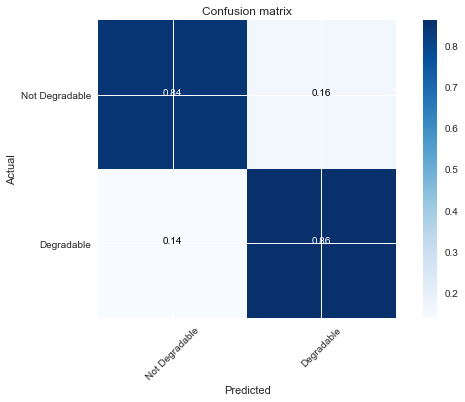

Our Accuracy is: 0.8485804416403786
Our Precision is: 0.7380952380952381
Our Sensitivity is: 0.8611111111111112
Our F-Score is: 0.7948717948717949


In [66]:
eclf_base_pred = eclf.predict(X_test)
results_dict_list.append(evaluate_classifier(y_test,eclf_base_pred, normalize=True));
results_model_names_list.append("Ensemble_poly")

# Model Selection

In [67]:
from functions import compare_models

Compare model score metrics

In [107]:
out_df = compare_models(results_dict_list, results_model_names_list )
out_df["sum"] = out_df.iloc[:,0:4].sum(axis = 1)
out_df.drop("confusion_matrix", axis = 1).applymap(lambda x: round(x,2)).sort_values(by = "sum", ascending = False)

,accuracy,precission,sensitivity,f_1,sum
LogR_base,0.89,0.82,0.86,0.84,3.40
LogR_lin_l1,0.88,0.81,0.86,0.83,3.39
Ensemble_lin,0.89,0.83,0.84,0.83,3.39
RandFor_lin,0.88,0.83,0.82,0.83,3.37
RandFor_poly,0.87,0.82,0.80,0.81,3.29
Ensemble_poly,0.85,0.74,0.86,0.79,3.24
LogR_poly,0.83,0.69,0.90,0.78,3.19
KNN_poly,0.82,0.69,0.84,0.76,3.11
KNN_lin,0.82,0.70,0.81,0.75,3.08


Plot results

In [110]:
out_df = out_df.sort_values(by = "sum", ascending = False)

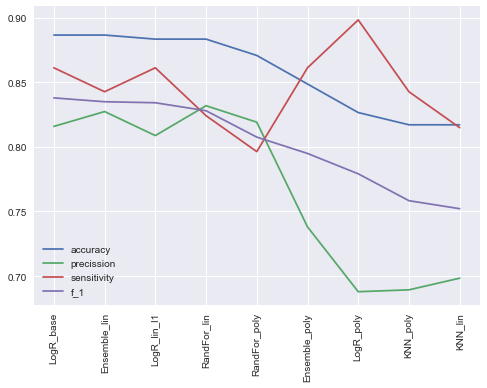

In [113]:
res_cols = ["accuracy","precission","sensitivity","f_1"]

for col in res_cols:
    plt.plot(out_df.index, out_df[col], label = col)
    plt.xticks(rotation=90)
    plt.legend()

## Result of Model Selection
Both Logistic Regression models without polynomial Features perform quite well, thus Logistic Regression is chosen for optimization

# Model Optimization

Select linear Features, that were not restricted to a coefficient of zero by lasso selection and reselect Training and Test Feature accordingly.

In [133]:
features = list(set(l1_keep).union((lin_cols_all)))
#features

In [134]:
X_train = X_train_poly[features]
X_test = X_test_poly[features]

## Gridsearch

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

A custom scoring is chosen to best fit all of the specified metrics

In [170]:
def custom_scorer(y_true,y_pred):
    f1 = metrics.f1_score(y_true,y_pred)
    acc = metrics.accuracy_score(y_true,y_pred)
    prec = metrics.precision_score(y_true,y_pred)
    sens = metrics.recall_score(y_true,y_pred)
    return f1+acc+prec+sens

In [201]:
lgR_20 = LogisticRegression(random_state = 42)
param_grid = {"solver":["liblinear","saga"],
          "penalty":["l1","l2"],
          "C":np.arange(0.1,1,0.05),
             }

In [202]:
grid_logR = GridSearchCV(estimator = lgR_20,
                         param_grid = param_grid,
                         scoring = make_scorer(custom_scorer),
                         cv = 5,
                         verbose = 4,
                         n_jobs = -1)

In [203]:
grid_logR.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.7s finished
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'solver': ['liblinear', 'saga'], 'penalty': ['l1', 'l2'], 'C': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(custom_scorer), verbose=4)

In [204]:
grid_logR.best_score_

3.273517697569766

Normalized confusion matrix
[[0.92156863 0.07843137]
 [0.18584071 0.81415929]]


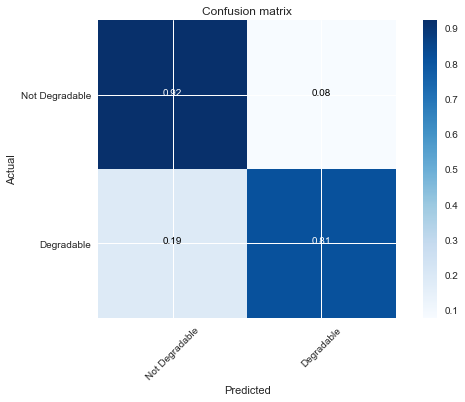

Our Accuracy is: 0.8832807570977917
Our Precision is: 0.8518518518518519
Our Sensitivity is: 0.8141592920353983
Our F-Score is: 0.832579185520362


In [207]:
grid_logR_pred = grid_logR.best_estimator_.predict(X_test)
evaluate_classifier(grid_logR_pred,y_test, normalize=True);

In [208]:
grid_logR.best_params_

{'C': 0.9000000000000002, 'penalty': 'l2', 'solver': 'liblinear'}

# Final Model

Refit Model and Evaluate

In [136]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Normalized confusion matrix
[[0.92079208 0.07920792]
 [0.2        0.8       ]]


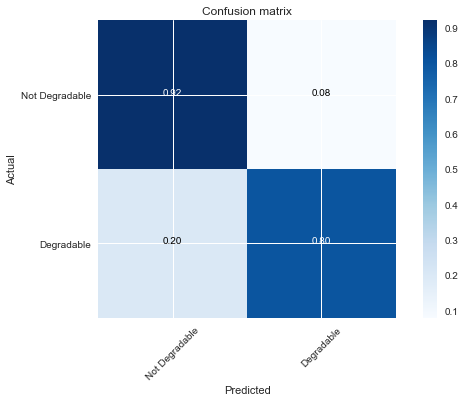

Our Accuracy is: 0.8769716088328076
Our Precision is: 0.8518518518518519
Our Sensitivity is: 0.8
Our F-Score is: 0.8251121076233184


In [151]:
lgR_2 = LogisticRegression(solver = "saga", penalty = "l1", C = 0.6, random_state=42)
lgR_2.fit(X_train,y_train)
lgR_2_pred = lgR_2.predict(X_test)
results_dict_list.append(evaluate_classifier(lgR_2_pred,y_test, normalize=True))

Allthough Model performance did not improve with serting interaction ter

## Inspect final feature importance

<Figure size 1152x1080 with 0 Axes>

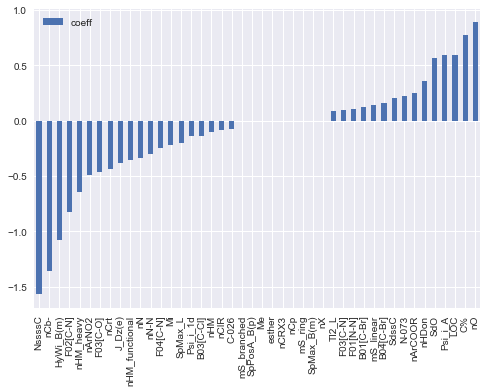

In [141]:
zeros = plot_coefs(X_train,lgR_2)

In [142]:
zeros

Index(['SpPosA_B(p)', 'Me', 'esther', 'nCRX3', 'nCp', 'mS_ring', 'SpMax_B(m)',
       'nX'],
      dtype='object')

<Figure size 1152x1080 with 0 Axes>

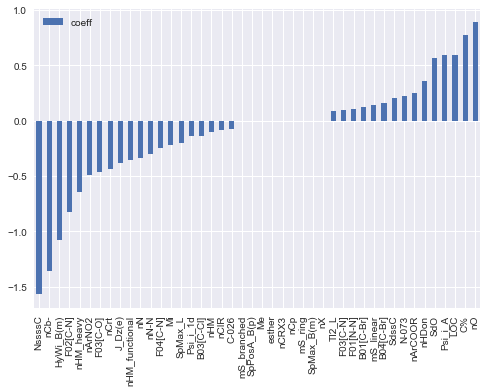

In [143]:
zeros_df = plot_coefs(X_train,lgR_2,return_nulls = False);

Rank top 20 most important features and display them for visualization

In [145]:
zeros_df["abs"] = zeros_df["coeff"].apply(lambda x: abs(x)) 

In [146]:
top_20_df = zeros_df.sort_values(by = "abs", ascending = False).head(20)

In [147]:
top_20_df["rank"] = list(range(1,21))

In [148]:
top_20_df[["rank","coeff"]]

,rank,coeff
NssssC,1,-1.567775
nCb-,2,-1.355981
HyWi_B(m),3,-1.082645
nO,4,0.887657
F02[C-N],5,-0.827276
C%,6,0.770061
nHM_heavy,7,-0.641827
LOC,8,0.595178
Psi_i_A,9,0.590848
SdO,10,0.567954


Get all Features in the final model that have non zero coefficients

In [150]:
inspect = list(set(X_train.columns)-set(zeros))
#inspect

Save Model

In [ ]:
import pickle

In [ ]:
#with open("lgR_model_save.pickle" ,"wb") as f:
 #   pickle.dump(lgR_2,f) 